# <h1> Importing Library and Dataset </h1> #

In [ ]:
!pip install optuna
!pip install lazypredict
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model, cluster, datasets
from sklearn.linear_model import Lasso, OrthogonalMatchingPursuit, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator

import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold
from sklearn import metrics
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from catboost import CatBoostRegressor, Pool, cv

from hyperopt import STATUS_OK
from hyperopt import hp
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import fmin, space_eval

import optuna
from optuna.samplers import TPESampler

import time
import warnings
import os
import xgboost
import pickle
import requests

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.8f}'.format)

print("Done")

Done


In [ ]:
df_train = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/train.csv")
df_test = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/test.csv")
print("Done")

Done


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      20355 non-null  object 
 1   api_calls      20355 non-null  float64
 2   clouds         20163 non-null  float64
 3   distance_max   20355 non-null  float64
 4   distance_mean  20355 non-null  float64
 5   distance_min   20355 non-null  float64
 6   humidity       20163 non-null  float64
 7   price_mean     20355 non-null  float64
 8   rain           20163 non-null  float64
 9   surge_max      20355 non-null  float64
 10  surge_mean     20355 non-null  float64
 11  surge_min      20355 non-null  float64
 12  temp           20163 non-null  float64
 13  wind           20163 non-null  float64
 14  type           20355 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          11040 non-null  int64  
 1   timestamp      11040 non-null  object 
 2   api_calls      11040 non-null  float64
 3   clouds         11040 non-null  float64
 4   distance_max   11040 non-null  float64
 5   distance_mean  11040 non-null  float64
 6   distance_min   11040 non-null  float64
 7   humidity       11040 non-null  float64
 8   rain           11040 non-null  float64
 9   surge_max      11040 non-null  float64
 10  surge_mean     11040 non-null  float64
 11  surge_min      11040 non-null  float64
 12  temp           11040 non-null  float64
 13  wind           11040 non-null  float64
 14  type           11040 non-null  int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 1.3+ MB


# <h1> Part 1: Preprocessing

## <h2> df_train </h2> ##

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      20355 non-null  object 
 1   api_calls      20355 non-null  float64
 2   clouds         20163 non-null  float64
 3   distance_max   20355 non-null  float64
 4   distance_mean  20355 non-null  float64
 5   distance_min   20355 non-null  float64
 6   humidity       20163 non-null  float64
 7   price_mean     20355 non-null  float64
 8   rain           20163 non-null  float64
 9   surge_max      20355 non-null  float64
 10  surge_mean     20355 non-null  float64
 11  surge_min      20355 non-null  float64
 12  temp           20163 non-null  float64
 13  wind           20163 non-null  float64
 14  type           20355 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df_train.head()

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type
0,2018-11-26 06:00:00,9.00000000,0.99066667,3.03000000,1.72666667,1.04000000,0.91333333,16.55555556,0.00000000,1.50000000,1.05555556,1.00000000,40.62733333,1.35066667,0
1,2018-11-26 07:00:00,10.00000000,0.97000000,2.67000000,1.69000000,1.09000000,0.92000000,17.30000000,0.00000000,2.00000000,1.10000000,1.00000000,41.13750000,1.73500000,0
2,2018-11-26 08:00:00,1.00000000,0.98000000,1.38000000,1.38000000,1.38000000,0.92333333,13.50000000,0.00000000,1.00000000,1.00000000,1.00000000,40.92000000,1.33000000,0
3,2018-11-26 09:00:00,11.00000000,1.00000000,3.08000000,1.92090909,1.39000000,0.92750000,17.95454545,0.00000000,1.75000000,1.11363636,1.00000000,40.93750000,1.36500000,0
4,2018-11-26 10:00:00,12.00000000,0.99500000,3.01000000,2.12250000,1.07000000,0.94000000,18.62500000,0.00000000,1.50000000,1.08333333,1.00000000,40.69500000,1.89500000,0


Correcting variable type for `timestamp`

In [ ]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20355 non-null  datetime64[ns]
 1   api_calls      20355 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20355 non-null  float64       
 4   distance_mean  20355 non-null  float64       
 5   distance_min   20355 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20355 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20355 non-null  float64       
 10  surge_mean     20355 non-null  float64       
 11  surge_min      20355 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20355 non-null  int64         
dtypes: datetime64[ns](1

### <h2> Missing Values </h2> ###

In [ ]:
df_train.isna().sum()

timestamp          0
api_calls          0
clouds           192
distance_max       0
distance_mean      0
distance_min       0
humidity         192
price_mean         0
rain             192
surge_max          0
surge_mean         0
surge_min          0
temp             192
wind             192
type               0
dtype: int64

In [ ]:
df_train.isna().sum()/len(df_train)

timestamp       0.00000000
api_calls       0.00000000
clouds          0.00943257
distance_max    0.00000000
distance_mean   0.00000000
distance_min    0.00000000
humidity        0.00943257
price_mean      0.00000000
rain            0.00943257
surge_max       0.00000000
surge_mean      0.00000000
surge_min       0.00000000
temp            0.00943257
wind            0.00943257
type            0.00000000
dtype: float64

We're going to drop the rows that contain missing values because the percentage of missing values on each column is < 1%

In [ ]:
df_train.dropna(axis=0, inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20163 non-null  datetime64[ns]
 1   api_calls      20163 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20163 non-null  float64       
 4   distance_mean  20163 non-null  float64       
 5   distance_min   20163 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20163 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20163 non-null  float64       
 10  surge_mean     20163 non-null  float64       
 11  surge_min      20163 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20163 non-null  int64         
dtypes: datetime64[ns](1

In [ ]:
df_train[df_train.duplicated()]

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type


In [ ]:
df_train['type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

## <h2> df_test </h2> ##

In [ ]:
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          11040 non-null  int64         
 1   timestamp      11040 non-null  datetime64[ns]
 2   api_calls      11040 non-null  float64       
 3   clouds         11040 non-null  float64       
 4   distance_max   11040 non-null  float64       
 5   distance_mean  11040 non-null  float64       
 6   distance_min   11040 non-null  float64       
 7   humidity       11040 non-null  float64       
 8   rain           11040 non-null  float64       
 9   surge_max      11040 non-null  float64       
 10  surge_mean     11040 non-null  float64       
 11  surge_min      11040 non-null  float64       
 12  temp           11040 non-null  float64       
 13  wind           11040 non-null  float64       
 14  type           11040 non-null  int64         
dtypes: datetime64[ns](1

# <h1> Part 2: Quick Visualization & Gaining Insights </h1> #

In [ ]:
df_train['hour'] = df_train['timestamp'].dt.hour
df_train['dw'] = df_train['timestamp'].dt.day_of_week
df_train['dm'] = df_train['timestamp'].dt.day

print(f"Unique Values hour: {df_train['hour'].unique()}")
print(f"Unique Values dw: {df_train['dw'].unique()}")
print(f"Unique Values dm: {df_train['dm'].unique()}")

df_train.info()

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.histplot(x = n, data = df_train)
  plt.title(f"Histogram for {n} Column")
  print("")
  plt.show()

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.scatterplot(x = n, y = 'price_mean', data = df_train)
  plt.title(f"Scatterplot between {n} with price_mean")
  print("")
  plt.show()

In [ ]:
df_train.groupby(["dw"])["api_calls", "price_mean"].agg(["mean"])

In [ ]:
df_train.describe()

In [ ]:
# Get unique types
types = df_train['type'].unique()

# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='distance_max', y='price_mean')

    plt.title(f'Scatterplot of distance_max vs price_mean for type {t}')
    plt.show()

In [ ]:
# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='surge_mean', y='price_mean')

    plt.title(f'Scatterplot of surge_mean vs price_mean for type {t}')
    plt.show()

In [ ]:
# Get unique types
types = df_train['type'].unique()

# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='distance_mean', y='price_mean')

    plt.title(f'Scatterplot of distance_mean vs price_mean for type {t}')
    plt.show()

In [ ]:
df_train.groupby('type')['distance_mean'].agg(['var']).sort_values(by='var', ascending=False)

# <h1> Part 3: Feature Engineering </h1> #

## <h2> Variables calculating distance for time(s) </h2> ##

### <h2> df_train </h2> ###

In [ ]:
def time_features_distance(df):

  time = pd.to_datetime(df['timestamp'])

  hour = time.dt.hour
  dw = time.dt.day_of_week
  dm = time.dt.day

  for time, col in zip([hour, dm, dw], ['hour', 'dm', 'dw']):
    time_range = {'hour': 24, 'dw': 7, 'dm': 31,}
    df[f'{col}_sin'] = np.sin(time * (2 * np.pi / time_range[col]))
    df[f'{col}_cos'] = np.cos(time * (2 * np.pi / time_range[col]))

  df['hour'] = hour
  df['dw'] = dw
  df['dm'] = dm

In [ ]:
time_features_distance(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20163 non-null  datetime64[ns]
 1   api_calls      20163 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20163 non-null  float64       
 4   distance_mean  20163 non-null  float64       
 5   distance_min   20163 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20163 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20163 non-null  float64       
 10  surge_mean     20163 non-null  float64       
 11  surge_min      20163 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20163 non-null  int64         
 15  hour_sin       2016

In [ ]:
df_train.head(5)

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type,hour_sin,hour_cos,dm_sin,dm_cos,dw_sin,dw_cos,hour,dw,dm
0,2018-11-26 06:00:00,9.00000000,0.99066667,3.03000000,1.72666667,1.04000000,0.91333333,16.55555556,0.00000000,1.50000000,1.05555556,1.00000000,40.62733333,1.35066667,0,1.00000000,0.00000000,-0.84864426,0.52896401,0.00000000,1.00000000,6,0,26
1,2018-11-26 07:00:00,10.00000000,0.97000000,2.67000000,1.69000000,1.09000000,0.92000000,17.30000000,0.00000000,2.00000000,1.10000000,1.00000000,41.13750000,1.73500000,0,0.96592583,-0.25881905,-0.84864426,0.52896401,0.00000000,1.00000000,7,0,26
2,2018-11-26 08:00:00,1.00000000,0.98000000,1.38000000,1.38000000,1.38000000,0.92333333,13.50000000,0.00000000,1.00000000,1.00000000,1.00000000,40.92000000,1.33000000,0,0.86602540,-0.50000000,-0.84864426,0.52896401,0.00000000,1.00000000,8,0,26
3,2018-11-26 09:00:00,11.00000000,1.00000000,3.08000000,1.92090909,1.39000000,0.92750000,17.95454545,0.00000000,1.75000000,1.11363636,1.00000000,40.93750000,1.36500000,0,0.70710678,-0.70710678,-0.84864426,0.52896401,0.00000000,1.00000000,9,0,26
4,2018-11-26 10:00:00,12.00000000,0.99500000,3.01000000,2.12250000,1.07000000,0.94000000,18.62500000,0.00000000,1.50000000,1.08333333,1.00000000,40.69500000,1.89500000,0,0.50000000,-0.86602540,-0.84864426,0.52896401,0.00000000,1.00000000,10,0,26


### <h2> df_test </h2> ###

In [ ]:
time_features_distance(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          11040 non-null  int64         
 1   timestamp      11040 non-null  datetime64[ns]
 2   api_calls      11040 non-null  float64       
 3   clouds         11040 non-null  float64       
 4   distance_max   11040 non-null  float64       
 5   distance_mean  11040 non-null  float64       
 6   distance_min   11040 non-null  float64       
 7   humidity       11040 non-null  float64       
 8   rain           11040 non-null  float64       
 9   surge_max      11040 non-null  float64       
 10  surge_mean     11040 non-null  float64       
 11  surge_min      11040 non-null  float64       
 12  temp           11040 non-null  float64       
 13  wind           11040 non-null  float64       
 14  type           11040 non-null  int64         
 15  hour_sin       1104

## <h2> Other Variables </h2> ##

In [ ]:
def conditions(df):
  conditions = [
      (df['clouds'] < 0.2),  # clear
      (df['clouds'] >= 0.2) & (df['clouds'] <= 0.7) & (df['rain'] < 0.2),  # cloudy
      (df['rain'] >= 0.2)  # rainy
  ]
  choices = ['clear', 'cloudy', 'rainy']
  df['weather_conditions'] = np.select(conditions, choices, default='unknown')

def create_distance_category(group):
    # Define thresholds for each group
    distance_thresholds = [group['distance_mean'].min(), group['distance_mean'].quantile(0.33), group['distance_mean'].quantile(0.66), group['distance_mean'].max()]

    # Create new feature for distance_mean categories
    group['distance_mean_category'] = pd.cut(group['distance_mean'], bins=distance_thresholds, labels=['short', 'medium', 'long'])

    return group

In [ ]:
conditions(df_train)
df_train = df_train.groupby('type').apply(create_distance_category)

df_train = pd.get_dummies(df_train, columns=['weather_conditions'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['distance_mean_category'], drop_first=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   20163 non-null  datetime64[ns]
 1   api_calls                   20163 non-null  float64       
 2   clouds                      20163 non-null  float64       
 3   distance_max                20163 non-null  float64       
 4   distance_mean               20163 non-null  float64       
 5   distance_min                20163 non-null  float64       
 6   humidity                    20163 non-null  float64       
 7   price_mean                  20163 non-null  float64       
 8   rain                        20163 non-null  float64       
 9   surge_max                   20163 non-null  float64       
 10  surge_mean                  20163 non-null  float64       
 11  surge_min                   20163 non-null  float64   

In [ ]:
conditions(df_test)
df_test = df_test.groupby('type').apply(create_distance_category)

df_test = pd.get_dummies(df_test, columns=['weather_conditions'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['distance_mean_category'], drop_first=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       11040 non-null  int64         
 1   timestamp                   11040 non-null  datetime64[ns]
 2   api_calls                   11040 non-null  float64       
 3   clouds                      11040 non-null  float64       
 4   distance_max                11040 non-null  float64       
 5   distance_mean               11040 non-null  float64       
 6   distance_min                11040 non-null  float64       
 7   humidity                    11040 non-null  float64       
 8   rain                        11040 non-null  float64       
 9   surge_max                   11040 non-null  float64       
 10  surge_mean                  11040 non-null  float64       
 11  surge_min                   11040 non-null  float64   

# <h1> Part 4: Modelling </h1> #

<h2> Model-model yang udah ditrain per 11 November 17.11 WIB bisa diakses di
https://github.com/JeftaAdriel/DataComp-PekanRistek23/tree/main/Model
</h2>

## <h2> Preparing the Data & Functions </h2> ##

<Axes: >

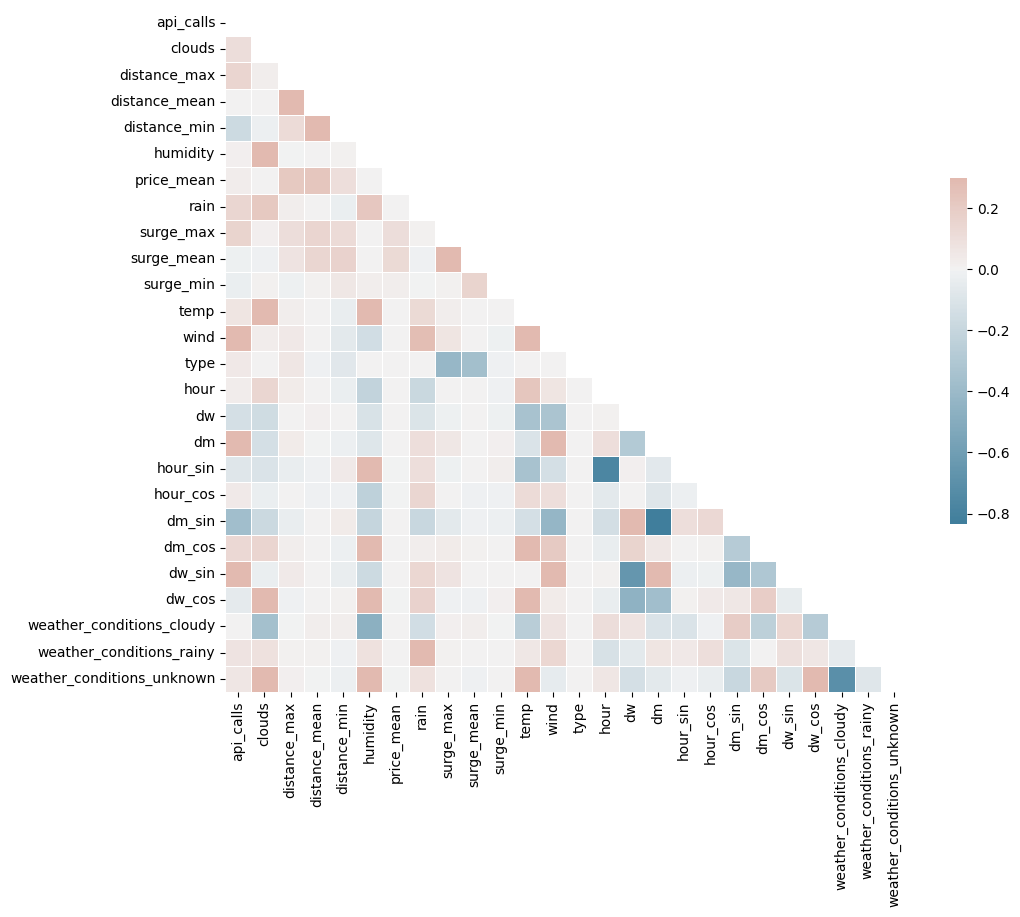

In [ ]:
num = df_train.select_dtypes(include = np.number)
corr = num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_train.drop(columns=['timestamp'], axis=1, inplace=True)
df_train = df_train.astype('float64')

df_test.drop(columns=['timestamp', 'index'], axis=1, inplace=True)
df_test = df_test.astype('float64')

print(df_train.info())
print("")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   api_calls                   20163 non-null  float64
 1   clouds                      20163 non-null  float64
 2   distance_max                20163 non-null  float64
 3   distance_mean               20163 non-null  float64
 4   distance_min                20163 non-null  float64
 5   humidity                    20163 non-null  float64
 6   price_mean                  20163 non-null  float64
 7   rain                        20163 non-null  float64
 8   surge_max                   20163 non-null  float64
 9   surge_mean                  20163 non-null  float64
 10  surge_min                   20163 non-null  float64
 11  temp                        20163 non-null  float64
 12  wind                        20163 non-null  float64
 13  type                        201

### <h2> Scaled Version (for Non-Tree Based Model) </h2> ###

In [ ]:
X_train_df = df_train.drop(columns=['price_mean', 'hour', 'type', 'hour_sin', 'hour_cos',
                                    'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                                    'weather_conditions_cloudy', 'weather_conditions_rainy',
                                    'weather_conditions_unknown', 'clouds', 'rain', 'humidity'], axis=1)
y_train_df = df_train[['price_mean']]
y_train = np.ravel(df_train[['price_mean']])

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_df)

# Convert the columns to a NumPy array
time_of_day_cols = df_train[['hour', 'type', 'hour_sin', 'hour_cos',
                             'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                             'weather_conditions_cloudy', 'weather_conditions_rainy',
                             'weather_conditions_unknown', 'clouds', 'rain', 'humidity']].values

# Concatenate the arrays along the second axis (columns)
X_train = np.concatenate([X_train, time_of_day_cols], axis=1)

In [ ]:
X_test_df = df_test.drop(columns=['hour', 'type', 'hour_sin', 'hour_cos',
                                  'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                                  'weather_conditions_cloudy', 'weather_conditions_rainy',
                                  'weather_conditions_unknown', 'clouds', 'rain', 'humidity'], axis=1)
X_test = scaler.fit_transform(X_test_df)

time_of_day_cols = df_test[['hour', 'type', 'hour_sin', 'hour_cos',
                            'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                            'weather_conditions_cloudy', 'weather_conditions_rainy',
                            'weather_conditions_unknown', 'clouds', 'rain', 'humidity']].values

X_test = np.concatenate([X_test, time_of_day_cols], axis=1)

### <h2> Non-Scaled Version (for Tree Based Model) </h2> ###

In [ ]:

X_train_nonscaled = df_train.drop(columns=['price_mean'], axis=1)
y_train_nonscaled = df_train[['price_mean']]
X_test_nonscaled = df_test.copy()


### <h2> Functions </h2> ###

In [ ]:
def feature_importance_viz(df, model):

  # Assuming features is a list of column names in the order used for training
  features = df.drop(['price_mean'], axis=1).columns.tolist()

  # Get feature importances from your model
  importances = list(model.feature_importances_)

  # Create a DataFrame to make sorting easier
  importance_df = pd.DataFrame({
      'feature': features,
      'importance': importances
  })

  # Sort the DataFrame by importance in descending order
  importance_df = importance_df.sort_values(by='importance', ascending=False)

  # Plot the feature importances
  plt.figure(figsize=(10, 6))
  plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert the y-axis to show the feature with the highest importance at the top
  plt.show()

## <h2> LazyRegressor </h2> ##

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train_df, test_size = 0.3, random_state = 123)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train2, X_test2, y_train2, y_test2)
models

SyntaxError: ignored

## <h2> XGBoost (FAILED) </h2> ##

### <h2> Hyperopt Package </h2> ###

In [ ]:
# Hyperopt Package

space = {'max_depth': hp.quniform('max_depth', 1, 4, 1),
         'gamma': hp.uniform('gamma', 7.0, 12.0),
         'learning_rate': hp.quniform('learning_rate', 0.001, 1, 0.001),
         'n_estimators': hp.quniform('n_estimators', 500, 750, 50),
         #'min_child_weight': hp.uniform('min_child_weight', 5, 10),
         'subsample': hp.uniform('subsample', 0.8, 1),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1),
         'reg_alpha': hp.uniform('reg_alpha', 1, 5),
         'reg_lambda': hp.uniform('reg_lambda', 9, 14),
         'random_state': hp.choice('random_state', [123])}

iteration_counter = {"iteration": 0}
kf = KFold(n_splits=30, shuffle=True, random_state=123)

def objective_XGB(params):
  iteration_counter["iteration"] += 1
  params['max_depth'] = int(params['max_depth'])
  params['n_estimators'] = int(params['n_estimators'])
  xgb = XGBRegressor(objective='reg:squarederror', **params)
  best_score = cross_val_score(xgb, X_train_nonscaled, y_train_nonscaled, scoring='neg_root_mean_squared_error', cv=kf).mean()
  print(f"Iteration: {iteration_counter['iteration']}, RMSE: {-best_score}, Params: {params}")
  return {'loss': -best_score, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective_XGB, space=space, algo=tpe.suggest, max_evals=60, trials=trials, rstate=np.random.default_rng(123))

print(best)


In [ ]:
#Hyperopt Package

# Get the best parameters
best_params = space_eval(space, best)

# Convert any float hyperparameters to int
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Create the final model
xgb_hyperopt = XGBRegressor(objective='reg:squarederror', **best_params)
print(xgb_hyperopt)
xgb_hyperopt.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_xgb = xgb_hyperopt.predict(X_train_nonscaled)
train_rmse_xgb = np.sqrt(mse(y_train_nonscaled, train_preds_xgb))

print("")
print(f"Train RMSE XGBoost Model: {train_rmse_xgb}")

In [ ]:
feature_importance_viz(xgb_hyperopt)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_xgb
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['abs_error'] = np.abs(analysis['error'])

errors = analysis.groupby('hour')[['error', 'abs_error']].agg('mean').sort_values(by='abs_error', ascending=False)
errors[:10]

### <h2> Optuna Package (Better than Hyperopt so far) </h2> ###

In [ ]:
start=time.time()

kf = KFold(n_splits=30, shuffle=True, random_state=123)

def objective(trial):
  params = {'max_depth': 5,
            'eval_metric': 'rmse',
            'gamma': trial.suggest_float('gamma', 8.8, 9.2),
            'learning_rate': trial.suggest_float('learning_rate', 0.021, 0.024, log=True),
            'n_estimators': 750,
            'subsample': trial.suggest_float('subsample', 0.77, 0.78),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.84, 0.855),
            'reg_alpha': trial.suggest_float('reg_alpha', 3.0, 3.65),
            'reg_lambda': trial.suggest_float('reg_lambda', 9.8, 9.9),
            'random_state': 123}

  xgb = XGBRegressor(objective='reg:squarederror', **params)
  best_score = cross_val_score(xgb, X_train_nonscaled, y_train_nonscaled, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_xgb = optuna.create_study(direction='minimize', sampler=sampler)
study_xgb.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

In [ ]:
print('Best hyperparameters:', study_xgb.best_params)
print('Best RMSE:', study_xgb.best_value)

In [ ]:
study_xgb.trials_dataframe().sort_values('value', ascending=True).head(5)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_xgb)

In [ ]:
optuna.visualization.plot_slice(study_xgb)

In [ ]:
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
# Best Parameter
best_params_xgb = study_xgb.best_params

# Create the final model
xgb_optuna = XGBRegressor(objective='reg:squarederror',
                          n_estimators=750, eval_metric='rmse',
                          **best_params_xgb)
print(xgb_optuna)
xgb_optuna.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_xgb = xgb_optuna.predict(X_train_nonscaled)
train_rmse_xgb = np.sqrt(mse(y_train_nonscaled, train_preds_xgb))

print("")
print(f"Train RMSE XGBoost Model: {train_rmse_xgb}")

In [ ]:
feature_importance_viz(df_train, xgb_optuna)

In [ ]:
pickle.dump(xgb_optuna, open('20231111-1711-XGB.pkl', 'wb'))

In [ ]:
model = pickle.load(open('https://github.com/JeftaAdriel/DataComp-PekanRistek23/blob/raw/Model/20231111-1711-LGBM.pkl', 'rb'))

## <h2> LightGBM (FAILED) </h2> ##

### <h2> Boosting = gbdt (Better than goss so far) </h2> ###

#### <h2> Hyperparameter Tuning </h2> ####

In [ ]:
start=time.time()

kf = KFold(n_splits=15, shuffle=True, random_state=123)

def objective(trial):
  params = {"objective": "regression",
            "metric": "rmse",
            "boosting": "gbdt",
            "n_estimators": 1033,
            "verbosity": -1,
            "random_state": 123,
            "bagging_freq": 1,
            "bagging_seed": 123,
            "feature_selection_seed": 123,
            "max_depth": 8,
            "learning_rate": trial.suggest_float("learning_rate", 0.055, 0.0552, log=True),
            "num_leaves": 21,
            "subsample": trial.suggest_float("subsample", 0.8924, 0.8925, log=True),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.749772, 0.749774, log=True),
            "lambda_l1": trial.suggest_float("lambda_l1", 0.141982, 0.141986, log=True),
            "lambda_l2": trial.suggest_float("lambda_l2", 0.139204, 0.139206, log=True),
            "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.10626, 0.106265, log=True),
            "min_data_in_leaf": 30}

  model = LGBMRegressor(**params)
  best_score = cross_val_score(model, X_train_nonscaled, np.ravel(y_train_nonscaled), scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_lgb_gbdt = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb_gbdt.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

[I 2023-11-15 17:34:09,596] A new study created in memory with name: no-name-c8ea2e14-327c-43aa-9d81-fce7a0221e64
[I 2023-11-15 17:35:02,576] Trial 0 finished with value: 0.584856662512576 and parameters: {'learning_rate': 0.05513921708565148, 'subsample': 0.892428612789106, 'colsample_bytree': 0.7497724537024393, 'lambda_l1': 0.1419842052451386, 'lambda_l2': 0.13920543893503975, 'min_gain_to_split': 0.10626211550358786}. Best is trial 0 with value: 0.584856662512576.
[I 2023-11-15 17:35:50,080] Trial 1 finished with value: 0.5846951031940851 and parameters: {'learning_rate': 0.055196145987851206, 'subsample': 0.892468481764606, 'colsample_bytree': 0.749772961863137, 'lambda_l1': 0.14198356845664245, 'lambda_l2': 0.13920468635279382, 'min_gain_to_split': 0.1062636452253}. Best is trial 1 with value: 0.5846951031940851.
[I 2023-11-15 17:36:37,078] Trial 2 finished with value: 0.5846978188257462 and parameters: {'learning_rate': 0.05508762508104686, 'subsample': 0.8924059674752707, 'cols

The cell took 1448.358945608139 seconds to run.


In [ ]:
print('Best hyperparameters:', study_lgb_gbdt.best_params)
print('Best RMSE:', study_lgb_gbdt.best_value)

Best hyperparameters: {'learning_rate': 0.055183554718213325, 'subsample': 0.8924759493436066, 'colsample_bytree': 0.7497729483767315, 'lambda_l1': 0.14198433814166272, 'lambda_l2': 0.1392045128848738, 'min_gain_to_split': 0.10626277561299022}
Best RMSE: 0.5833902591622065


In [ ]:
study_lgb_gbdt.trials_dataframe().sort_values('value', ascending=True).head(5)

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_lambda_l1,params_lambda_l2,params_learning_rate,params_min_gain_to_split,params_subsample,state
27,27,0.58339026,2023-11-15 17:55:54.708073,2023-11-15 17:56:42.430249,0 days 00:00:47.722176,0.74977295,0.14198434,0.13920451,0.05518355,0.10626278,0.89247595,COMPLETE
21,21,0.58380018,2023-11-15 17:51:00.948482,2023-11-15 17:51:48.042970,0 days 00:00:47.094488,0.74977304,0.14198367,0.13920466,0.05518562,0.10626376,0.89246828,COMPLETE
14,14,0.58423996,2023-11-15 17:45:22.756997,2023-11-15 17:46:09.915183,0 days 00:00:47.158186,0.74977317,0.14198332,0.13920412,0.05517310,0.10626365,0.89247030,COMPLETE
26,26,0.58461487,2023-11-15 17:55:06.454126,2023-11-15 17:55:54.702054,0 days 00:00:48.247928,0.74977303,0.14198409,0.13920447,0.05518055,0.10626292,0.89247291,COMPLETE
13,13,0.58466106,2023-11-15 17:44:35.123832,2023-11-15 17:45:22.753979,0 days 00:00:47.630147,0.74977314,0.14198345,0.13920409,0.05512597,0.10626369,0.89246987,COMPLETE


In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_lgb_gbdt)

In [ ]:
optuna.visualization.plot_slice(study_lgb_gbdt)

In [ ]:
optuna.visualization.plot_optimization_history(study_lgb_gbdt)

#### <h2> Fitting to Train </h2> ####

In [ ]:
# Best Parameter
best_params_lgb = study_lgb_gbdt.best_params

lgb_optuna_gbdt = LGBMRegressor(objective='regression', metric='rmse', verbosity=-1,
                          bagging_freq=1, random_state=123,
                           **best_params_lgb)

print(lgb_optuna_gbdt)
lgb_optuna_gbdt.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_lgb = lgb_optuna_gbdt.predict(X_train_nonscaled)
train_rmse_lgb = np.sqrt(mse(y_train_nonscaled, train_preds_lgb))

print("")
print(f"Train RMSE LightGBM: {train_rmse_lgb}")

LGBMRegressor(bagging_freq=1, colsample_bytree=0.7497729483767315,
              lambda_l1=0.14198433814166272, lambda_l2=0.1392045128848738,
              learning_rate=0.055183554718213325, metric='rmse',
              min_gain_to_split=0.10626277561299022, objective='regression',
              random_state=123, subsample=0.8924759493436066, verbosity=-1)

Train RMSE LightGBM: 0.7012264003631203


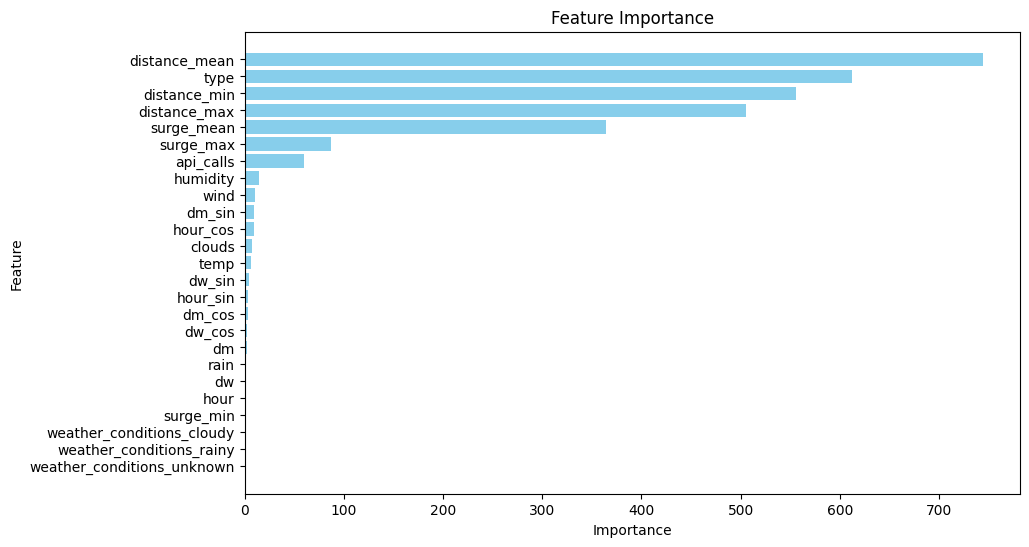

In [ ]:
feature_importance_viz(df_train, lgb_optuna_gbdt)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_lgb
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['rmse'] = train_rmse_lgb

errors = analysis.groupby('hour')[['error', 'rmse']].agg('mean').sort_values(by='hour', ascending=False)
errors[:10]

,error,rmse
hour,,
23.00000000,-0.03243485,0.70122640
22.00000000,-0.00708663,0.70122640
21.00000000,-0.03068189,0.70122640
20.00000000,-0.03681616,0.70122640
19.00000000,0.00261711,0.70122640
18.00000000,-0.03770710,0.70122640
17.00000000,0.01712564,0.70122640
16.00000000,-0.01196824,0.70122640
15.00000000,0.01251783,0.70122640


#### <h2> Submission </h2> ####

In [ ]:
submission = lgb_optuna_gbdt.predict(X_test)

index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission (LGB RMSE CV 0.5833, RMSE Train 0.7012).csv', index=False)

#### <h2> Saving Model </h2> ####

In [ ]:
pickle.dump(lgb_optuna_gbdt, open('20231116-0112-LGBM.pkl', 'wb'))

In [ ]:
url = 'https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Model/20231111-1711-XGB.pkl'
response = requests.get(url)
lgb_optuna_gbdt = pickle.loads(response.content)

### <h2> Boosting = goss </h2> ###

In [ ]:
start=time.time()

kf = KFold(n_splits=30, shuffle=True, random_state=123)

def objective(trial):
  params = {"objective": "regression",
            "metric": "rmse",
            "boosting": "goss",
            "n_estimators": 1000,
            "verbosity": -1,
            "random_state": 123,
            "learning_rate": trial.suggest_float("learning_rate", 0.015, 0.1, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 2, 2**5),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 30)}

  model = LGBMRegressor(**params)
  best_score = cross_val_score(model, X_train_nonscaled, np.ravel(y_train_nonscaled), scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_lgb_goss = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb_goss.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

In [ ]:
print('Best hyperparameters:', study_lgb_goss.best_params)
print('Best RMSE:', study_lgb_goss.best_value)

In [ ]:
study_lgb_goss.trials_dataframe().sort_values('value', ascending=True).head(5)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_lgb_goss)

In [ ]:
optuna.visualization.plot_slice(study_lgb_goss)

In [ ]:
optuna.visualization.plot_optimization_history(study_lgb_goss)

In [ ]:
# Best Parameter
best_params_lgb = study_lgb_goss.best_params

lgb_optuna_goss = LGBMRegressor(objective='regression', metric='rmse',
                                boosting='goss', random_state=123,
                                n_estimators=1000, verbosity=-1,
                                **best_params_lgb)

print(lgb_optuna_goss)
lgb_optuna_goss.fit(X_train_nonscaled, np.ravel(y_train_nonscaled))
train_preds_lgb = lgb_optuna_goss.predict(X_train_nonscaled)
train_rmse_lgb = np.sqrt(mse(y_train_nonscaled, train_preds_lgb))

print("")
print(f"Train RMSE LightGBM: {train_rmse_lgb}")

## <h2> HistGradientBoostingRegressor (FAILED) </h2> ##

In [ ]:
start=time.time()

kf = KFold(n_splits=30, shuffle=True, random_state=123)

def objective(trial):
  params = {"random_state": 123,
            "learning_rate": trial.suggest_float("learning_rate", 0.048, 0.052, log=True),
            "l2_regularization": trial.suggest_float("l2_regularization", 0.003, 0.00305, log=True),
            "max_iter": 1000,
            "max_depth": 5,
            "max_leaf_nodes": 54,
            "min_samples_leaf": 22}

  model = HistGradientBoostingRegressor(**params)
  best_score = cross_val_score(model, X_train_nonscaled, y_train_nonscaled, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_hgbr = optuna.create_study(direction='minimize', sampler=sampler)
study_hgbr.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

In [ ]:
print('Best hyperparameters:', study_hgbr.best_params)
print('Best RMSE:', study_hgbr.best_value)

In [ ]:
study_hgbr.trials_dataframe().sort_values('value', ascending=True).head(5)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_hgbr)

In [ ]:
optuna.visualization.plot_slice(study_hgbr)

In [ ]:
optuna.visualization.plot_optimization_history(study_hgbr)

In [ ]:
# Best Parameter
best_params_hgbr = study_hgbr.best_params

hgbr = HistGradientBoostingRegressor(random_state = 123,
                                     max_iter = 1000,
                                     **best_params_hgbr)

print(hgbr)
hgbr.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_hgbr = hgbr.predict(X_train_nonscaled)
train_rmse_hgbr = np.sqrt(mse(y_train_nonscaled, train_preds_hgbr))

print("")
print(f"Train RMSE HistGradientBoostingRegressor: {train_rmse_lgb}")

## <h2> Catboost </h2> ##

### <h2> Version 1 (Using Pool function of CatBoost) (FAILED) </h2> ##

#### <h2> Preparing </h2> ####

##### <h2> Scaled Version </h2> ####

In [ ]:
df_train_cb = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/train.csv")
df_test_cb = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/test.csv")

df_train_cb['timestamp'] = pd.to_datetime(df_train_cb['timestamp'])
df_test_cb['timestamp'] = pd.to_datetime(df_test_cb['timestamp'])

df_train_cb.dropna(axis=0, inplace = True)

time_features_distance(df_train_cb)
time_features_distance(df_test_cb)

conditions(df_train_cb)
conditions(df_test_cb)

df_train_cb.drop(columns=['timestamp'], axis=1, inplace=True)
df_test_cb.drop(columns=['timestamp', 'index'], axis=1, inplace=True)

df_train_cb["weather_conditions"] = df_train_cb["weather_conditions"].astype("category")
df_test_cb["weather_conditions"] = df_test_cb["weather_conditions"].astype("category")

X_train_df_cb = df_train_cb.drop(columns=['price_mean', 'hour', 'type', 'hour_sin', 'hour_cos',
                                          'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                                          'weather_conditions', 'clouds', 'rain', 'humidity'], axis=1)
y_train_df_cb = df_train_cb[['price_mean']]
y_train_cb = np.ravel(df_train_cb[['price_mean']])
scaler = RobustScaler()
X_train_cb = scaler.fit_transform(X_train_df_cb)

# Convert the columns to a NumPy array
time_of_day_cols = df_train_cb[['hour', 'type', 'hour_sin', 'hour_cos',
                                'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                                'weather_conditions', 'clouds', 'rain', 'humidity']].values
# Concatenate the arrays along the second axis (columns)
X_train_cb = np.concatenate([X_train_cb, time_of_day_cols], axis=1)

# Create a DataFrame from the NumPy array
X_train_df_cb = pd.DataFrame(X_train_cb, columns=X_train_df_cb.columns.tolist() +
 ['hour', 'type', 'hour_sin', 'hour_cos',
  'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
  'weather_conditions', 'clouds', 'rain', 'humidity'])
cat_features = ['weather_conditions']
cat_features_indices = [X_train_df_cb.columns.get_loc(col) for col in cat_features]

train_pool = Pool(data=X_train_df_cb, label=y_train_df_cb, cat_features=cat_features_indices)

X_test_df_cb = df_test_cb.drop(columns=['hour', 'type', 'hour_sin', 'hour_cos',
                                        'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos',
                                        'dw', 'dm', 'weather_conditions',
                                        'clouds', 'rain', 'humidity'], axis=1)
X_test_cb = scaler.fit_transform(X_test_df_cb)
time_of_day_cols = df_test_cb[['hour', 'type', 'hour_sin', 'hour_cos',
                              'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                              'weather_conditions', 'clouds', 'rain', 'humidity']].values
X_test_cb = np.concatenate([X_test_cb, time_of_day_cols], axis=1)


##### <h2> Unscaled Version </h2> #####

In [ ]:
df_train_cb = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/train.csv")
df_test_cb = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/test.csv")

df_train_cb['timestamp'] = pd.to_datetime(df_train_cb['timestamp'])
df_test_cb['timestamp'] = pd.to_datetime(df_test_cb['timestamp'])

df_train_cb.dropna(axis=0, inplace = True)

time_features_distance(df_train_cb)
time_features_distance(df_test_cb)

conditions(df_train_cb)
conditions(df_test_cb)

df_train_cb.drop(columns=['timestamp'], axis=1, inplace=True)
df_test_cb.drop(columns=['timestamp', 'index'], axis=1, inplace=True)

df_train_cb["weather_conditions"] = df_train_cb["weather_conditions"].astype("category")
df_test_cb["weather_conditions"] = df_test_cb["weather_conditions"].astype("category")

X_train_cb = df_train_cb.drop(columns=['price_mean'], axis=1)
y_train_cb = df_train_cb[['price_mean']]

cat_features = ['weather_conditions']
cat_features_indices = [X_train_cb.columns.get_loc(col) for col in cat_features]

train_pool = Pool(data=X_train_cb, label=y_train_cb, cat_features=cat_features_indices)

X_test_cb = df_test_cb.copy()

#### <h2> Hyperparameter Tuning </h2> ####

In [ ]:
#CPU
def objective(trial):
  params = {"random_state": 123,
            "loss_function": "RMSE",
            "iterations": 3070,
            "learning_rate": trial.suggest_float("learning_rate", 0.042, 0.046, log=True),
            "depth": 6,
            "subsample": trial.suggest_float("subsample", 0.74, 0.8, log=True),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.694, 0.713, log=True),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 29, 30)}

  model = CatBoostRegressor(**params, silent=True)

  # Perform cross-validation
  cv_results = cv(params=model.get_params(), pool=train_pool, fold_count=5,
                  shuffle=True, partition_random_seed=123,
                  stratified=False, logging_level='Silent')

  # Get the best score
  best_score = cv_results['test-RMSE-mean'].min()
  return best_score

sampler = TPESampler(seed=123)
study_cb_ver1 = optuna.create_study(direction='minimize', sampler=sampler)
study_cb_ver1.optimize(objective, n_trials=30)


In [ ]:
print('Best hyperparameters:', study_cb_ver1.best_params)
print('Best RMSE:', study_cb_ver1.best_value)

In [ ]:
study_cb_ver1.trials_dataframe().sort_values('value', ascending=True).head(5)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_cb_ver1)

In [ ]:
optuna.visualization.plot_slice(study_cb_ver1)

In [ ]:
optuna.visualization.plot_optimization_history(study_cb_ver1)

#### <h2> Fitting to Train </h2> ####

In [ ]:
# Indices of categorical features
cat_features_indices = [X_train_df_cb.columns.get_loc(col) for col in cat_features]

best_params_cb = study_cb_ver1.best_params

# Now you can use best_params_cb to initialize your model
cb1 = CatBoostRegressor(random_state=123, **best_params_cb, silent=True)

# Fit the model
cb1.fit(X_train_df_cb, y_train_cb, cat_features=cat_features_indices)
train_preds_cb1 = cb1.predict(X_train_cb)
train_rmse_cb1 = np.sqrt(mse(y_train_cb, train_preds_cb1))

print(cb1.get_params())
print("")
print(f"Train RMSE CatBoost: {train_rmse_cb1}")

In [ ]:
feature_importance_viz(df_train_cb, cb1)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_cb1
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['rmse'] = train_rmse_cb1

errors = analysis.groupby('hour')[['error', 'rmse']].agg('median').sort_values(by='rmse', ascending=False)
errors[:10]

#### <h2> Submission </h2> ####

In [ ]:
submission = cb1.predict(X_test_cb)

index = np.arange(0, 11040)
index

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission.csv', index=False)

### <h2> Version 2 (Final Version that's used to submit final model) </h2> ###

#### <h2> Hyperparameter Tuning </h2> ####

In [ ]:
start=time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=123)

def objective(trial):
  params = {"random_state": 123,
            "loss_function": "RMSE",
            "iterations": 1000,
            "learning_rate": trial.suggest_float("learning_rate", 0.0785554, 0.0785555, log=True),
            "depth": 7,
            "subsample": trial.suggest_float("subsample", 0.810417, 0.8104171, log=True),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.8212551, 0.8212552, log=True),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.7833714, 0.7833715, log=True),
            "random_strength": trial.suggest_float("random_strength", 0.0787843, 0.0787845, log=True),
            "min_data_in_leaf": 31}

  model = CatBoostRegressor(**params, silent=True)
  best_score = cross_val_score(model, X_train_nonscaled, y_train_nonscaled, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_cb_ver2 = optuna.create_study(direction='minimize', sampler=sampler)
study_cb_ver2.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

[I 2023-11-18 13:34:52,470] A new study created in memory with name: no-name-b8e65b7a-8ef7-4132-a0a7-e7a681749485
[I 2023-11-18 13:37:05,253] Trial 0 finished with value: 0.563169181022426 and parameters: {'learning_rate': 0.03068526696469151, 'subsample': 0.8303303144557144, 'colsample_bylevel': 0.8142845369859933, 'l2_leaf_reg': 0.3907486537584787, 'random_strength': 0.09821843843183375}. Best is trial 0 with value: 0.563169181022426.
[I 2023-11-18 13:39:09,958] Trial 1 finished with value: 0.5631617306967899 and parameters: {'learning_rate': 0.0306852642310642, 'subsample': 0.8303305923056776, 'colsample_bylevel': 0.8142936965417591, 'l2_leaf_reg': 0.3903966691537041, 'random_strength': 0.09789090182697939}. Best is trial 1 with value: 0.5631617306967899.
[I 2023-11-18 13:41:17,197] Trial 2 finished with value: 0.5639666474011766 and parameters: {'learning_rate': 0.030685263431779783, 'subsample': 0.8303304916198639, 'colsample_bylevel': 0.8142887713844172, 'l2_leaf_reg': 0.38829659

The cell took 3776.8224642276764 seconds to run.


In [ ]:
print('Best hyperparameters:', study_cb_ver2.best_params)
print('Best RMSE:', study_cb_ver2.best_value)

Best hyperparameters: {'learning_rate': 0.03068526220104383, 'subsample': 0.8303304887154379, 'colsample_bylevel': 0.8142878489229867, 'l2_leaf_reg': 0.39004589885894997, 'random_strength': 0.09797081776220397}
Best RMSE: 0.5616561206139628


In [ ]:
study_cb_ver2.trials_dataframe().sort_values('value', ascending=True).head(5)

,number,value,datetime_start,datetime_complete,duration,params_colsample_bylevel,params_l2_leaf_reg,params_learning_rate,params_random_strength,params_subsample,state
27,27,0.56165612,2023-11-18 14:31:35.369360,2023-11-18 14:33:39.153584,0 days 00:02:03.784224,0.81428785,0.39004590,0.03068526,0.09797082,0.83033049,COMPLETE
26,26,0.56247587,2023-11-18 14:29:29.262790,2023-11-18 14:31:35.364039,0 days 00:02:06.101249,0.81428774,0.38986166,0.03068526,0.09803236,0.83033042,COMPLETE
20,20,0.56260200,2023-11-18 14:16:59.280134,2023-11-18 14:19:02.805623,0 days 00:02:03.525489,0.81428824,0.38984186,0.03068526,0.09824671,0.83033045,COMPLETE
18,18,0.56270063,2023-11-18 14:12:48.908171,2023-11-18 14:14:52.855144,0 days 00:02:03.946973,0.81428445,0.38954644,0.03068526,0.09810750,0.83033042,COMPLETE
25,25,0.56270081,2023-11-18 14:27:23.001120,2023-11-18 14:29:29.257990,0 days 00:02:06.256870,0.81428477,0.39006275,0.03068526,0.09803697,0.83033042,COMPLETE


In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_cb_ver2)

In [ ]:
optuna.visualization.plot_slice(study_cb_ver2)

In [ ]:
optuna.visualization.plot_optimization_history(study_cb_ver2)

#### <h2> Fitting to Train </h2> ####

In [ ]:
# Best Parameter
best_params_cb = study_cb_ver2.best_params

cb2 = CatBoostRegressor(random_state = 123, **best_params_cb, silent=True)

cb2.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_cb2 = cb2.predict(X_train_nonscaled)
train_rmse_cb2 = np.sqrt(mse(y_train_nonscaled, train_preds_cb2))

print(cb2.get_params())
print("")
print(f"Train RMSE CatBoost: {train_rmse_cb2}")

{'learning_rate': 0.03068526220104383, 'l2_leaf_reg': 0.39004589885894997, 'loss_function': 'RMSE', 'silent': True, 'random_strength': 0.09797081776220397, 'subsample': 0.8303304887154379, 'colsample_bylevel': 0.8142878489229867, 'random_state': 123}

Train RMSE CatBoost: 0.5044679923323249


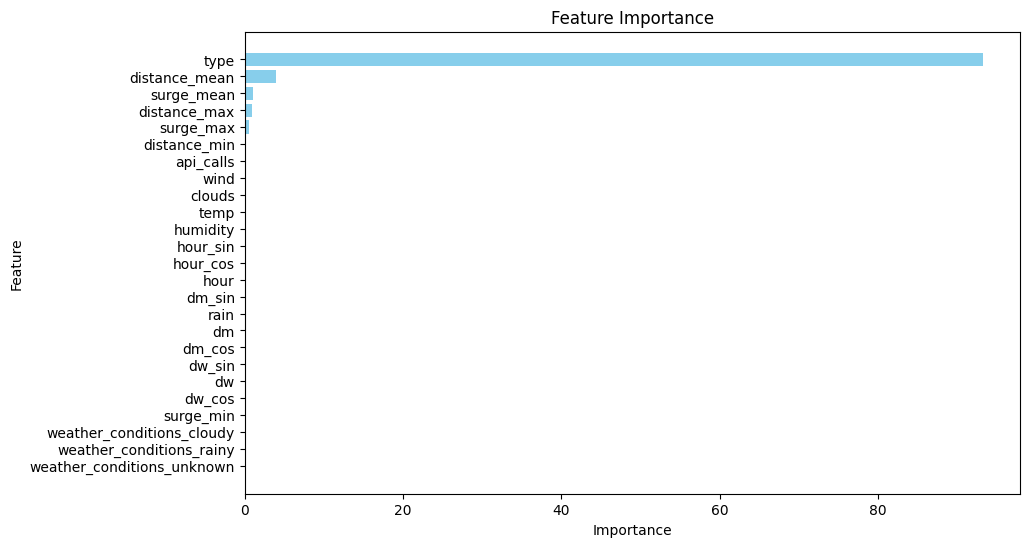

In [ ]:
feature_importance_viz(df_train, cb2)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_cb2
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['rmse'] = train_rmse_cb2

errors = analysis.groupby('hour')[['error', 'rmse']].agg('median').sort_values(by='rmse', ascending=False)
errors[:10]

#### <h2> Submission </h2> ####

In [ ]:
submission = cb2.predict(X_test)

index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission.csv', index=False)

#### <h2> Saving Model </h2> ####

In [ ]:
pickle.dump(cb2, open('20231115-1808-CB-Nonscaled.pkl', 'wb'))

## <h2> SVR (FAILED) </h2> ##

#### <h2> Hyperparameter Tuning </h2> ####

In [ ]:
start=time.time()

kf = KFold(n_splits=15, shuffle=True, random_state=123)

def objective(trial):
  params = {"kernel": "rbf",
            "C" : trial.suggest_float("C", 1, 10),
            "gamma" : trial.suggest_float("gamma", 0.1, 1, step=0.1),
            "epsilon" : trial.suggest_float('epsilon', 0.01, 1)}

  model = SVR(**params)
  best_score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_svr = optuna.create_study(direction='minimize', sampler=sampler)
study_svr.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

In [ ]:
print('Best hyperparameters:', study_svr.best_params)
print('Best RMSE:', study_svr.best_value)

In [ ]:
study_svr.trials_dataframe().sort_values('value', ascending=True).head(5)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_svr)

In [ ]:
optuna.visualization.plot_slice(study_svr)

In [ ]:
optuna.visualization.plot_optimization_history(study_svr)

#### <h2> Fitting to Train </h2> ####

In [ ]:
# Best Parameter
best_params_svr = study_svr.best_params

svr = SVR(random_state = 123, **best_params_svr, silent=True)

svr.fit(X_train, y_train)
train_preds_svr = svr.predict(X_train)
train_rmse_svr = np.sqrt(mse(y_train, train_preds_svr))

print(svr.get_params())
print("")
print(f"Train RMSE svr: {train_rmse_svr}")

In [ ]:
feature_importance_viz(df_train, svr)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_svr
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['rmse'] = train_rmse_svr

errors = analysis.groupby('hour')[['error', 'rmse']].agg('mean').sort_values(by='rmse', ascending=False)
errors[:10]

#### <h2> Submission </h2> ####

In [ ]:
submission = svr.predict(X_test)

index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission (SVR Scaled RMSE CV 0.563, RMSE Train 0.4135).csv', index=False)

#### <h2> Saving Model </h2> ####

In [ ]:
pickle.dump(cb2, open('20231115-1808-SVR-Scaled.pkl', 'wb'))

## <h2> StackCV (FAILED) </h2> ##

### <h2> Preparing Base Learners </h2> ###

In [ ]:
url = 'https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Model/20231116-0112-LGBM.pkl'
response = requests.get(url)
lgb = pickle.loads(response.content)

url = 'https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Model/20231115-2330-CB-Nonscaled.pkl'
response = requests.get(url)
cb = pickle.loads(response.content)

url = 'https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Model/20231116-0410-SVR-Scaled.pkl'
response = requests.get(url)
svr = pickle.loads(response.content)

In [ ]:
print(lgb)

LGBMRegressor(bagging_freq=1, colsample_bytree=0.7497729483767315,
              lambda_l1=0.14198433814166272, lambda_l2=0.1392045128848738,
              learning_rate=0.055183554718213325, metric='rmse',
              min_gain_to_split=0.10626277561299022, objective='regression',
              random_state=123, subsample=0.8924759493436066, verbosity=-1)


In [ ]:
print(cb.get_params())

{'iterations': 2908, 'learning_rate': 0.03068522628358176, 'l2_leaf_reg': 0.389483153972757, 'loss_function': 'RMSE', 'silent': True, 'random_strength': 0.09878367703443648, 'subsample': 0.8303315831003546, 'colsample_bylevel': 0.8143103169004386, 'random_state': 123}


In [ ]:
print(svr.get_params)

<bound method BaseEstimator.get_params of SVR(C=8.0, epsilon=0.23, gamma=0.1)>


In [ ]:
X_train_nonscaled = df_train.drop(columns=['price_mean'], axis=1)
y_train_nonscaled = df_train[['price_mean']]
X_test_nonscaled = df_test.copy()

### <h2> Error Correlation </h2> ###

In [ ]:
train_preds_lgb = lgb.predict(X_train_nonscaled)
train_rmse_lgb = np.sqrt(mse(y_train_nonscaled, train_preds_lgb))

train_preds_cb = cb.predict(X_train_nonscaled)
train_rmse_cb = np.sqrt(mse(y_train_nonscaled, train_preds_cb))

train_preds_svr = svr.predict(X_train)
train_rmse_svr = np.sqrt(mse(y_train, train_preds_svr))

residuals_lgb = y_train_nonscaled.values.ravel() - train_preds_lgb
residuals_cb = y_train_nonscaled.values.ravel() - train_preds_cb
residuals_svr = y_train - train_preds_svr

correlation = np.corrcoef([residuals_lgb, residuals_cb, residuals_svr])
print(correlation)

[[1.         0.70853826 0.32074603]
 [0.70853826 1.         0.25679655]
 [0.32074603 0.25679655 1.        ]]


The idea is to get the base learners that the error correlation is low, so because LightGBM and CatBoost error correlation is quite high (0.7), and we know that CatBoost > LightGBM in this case, then we don't use LightGBM, instead only use CatBoost and SVR

### <h2> Modelling </h2> ###

In [ ]:
# Define the columns to be scaled
cols_to_scale = df_train.drop(columns=['price_mean', 'hour', 'type', 'hour_sin', 'hour_cos',
                                    'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                                    'weather_conditions_cloudy', 'weather_conditions_rainy',
                                    'weather_conditions_unknown', 'clouds', 'rain', 'humidity'], axis=1).columns.tolist()
cols_to_exclude = ['hour', 'type', 'hour_sin', 'hour_cos', 'dm_sin', 'dm_cos', 'dw_sin', 'dw_cos', 'dw', 'dm',
                   'weather_conditions_cloudy', 'weather_conditions_rainy', 'weather_conditions_unknown',
                   'clouds', 'rain', 'humidity']

class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns)

# Create a preprocessor
ct = ColumnTransformer([
         ('pass', 'passthrough', cols_to_exclude),
         ('robust_scaler', RobustScaler(), cols_to_scale)
                      ]).set_output(transform='pandas')

# Create pipelines
pipeline_svr = make_pipeline(ArrayToDataFrame(X_train_nonscaled.columns), ct, svr)
pipeline_cb = make_pipeline(cb)

# Use pipelines in StackingCVRegressor
stackcv = StackingCVRegressor(regressors=(pipeline_cb, pipeline_svr),
                              meta_regressor = pipeline_cb,
                              use_features_in_secondary = True)

# Now you can fit and predict using the same X_train and X_test
stackcv.fit(X_train_nonscaled, y_train_nonscaled.values.ravel())
train_preds_stackcv = stackcv.predict(X_train_nonscaled)
train_rmse_stackcv = np.sqrt(mse(y_train_nonscaled, train_preds_stackcv))

print(f"Train RMSE: {train_rmse_stackcv}")

test_preds_stackcv = stackcv.predict(X_test_nonscaled)

Train RMSE: 0.3821405418291584


In [ ]:
index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': test_preds_stackcv})

df_submission.to_csv('submission (StackCV 2 Model).csv', index=False)

## <h2> GEM (FAILED) </h2> ##

This part is essentially trying to replicate this code but still failed

https://github.com/mohsenshahhosseini/GEM-ITH-Ensemble/blob/main/Fish_code.py

In [ ]:
# Part 1: Calculating RMSE and Prediction

kf = KFold(n_splits=30, shuffle=True, random_state=123)

# LightGBM
lgb_GEM_df = pd.DataFrame()
for train_index, test_index in kf.split(X_train, y_train):
  lgb_optuna_gbdt.fit(np.array(X_train)[train_index], np.array(y_train)[train_index])
  lgb_GEM_df = pd.concat([lgb_GEM_df, pd.DataFrame(lgb_optuna_gbdt.predict(np.array(X_train)[test_index]))])
lgb_optuna_gbdt.fit(X_train, y_train)
lgb_GEM_rmse = np.sqrt(mse(y_train, lgb_GEM_df))
print(f"RMSE Train LightGBM: {lgb_GEM_rmse}")
lgb_GEM_predict = lgb_optuna_gbdt.predict(X_test)

# HistGradientBoostingRegressor
hgbr_GEM_df = pd.DataFrame()
for train_index, test_index in kf.split(X_train, y_train):
  hgbr.fit(np.array(X_train)[train_index], np.array(y_train)[train_index])
  hgbr_GEM_df = pd.concat([hgbr_GEM_df, pd.DataFrame(hgbr.predict(np.array(X_train)[test_index]))])
hgbr.fit(X_train, y_train)
hgbr_GEM_rmse = np.sqrt(mse(y_train, hgbr_GEM_df))
print(f"RMSE Train HistGradientBoostingRegressor: {hgbr_GEM_rmse}")
hgbr_GEM_predict = hgbr.predict(X_test)

# XGBoost
xgb_GEM_df = pd.DataFrame()
for train_index, test_index in kf.split(X_train, y_train):
  xgb_optuna.fit(np.array(X_train)[train_index], np.array(y_train)[train_index])
  xgb_GEM_df = pd.concat([xgb_GEM_df, pd.DataFrame(xgb_optuna.predict(np.array(X_train)[test_index]))])
xgb_optuna.fit(X_train, y_train)
xgb_GEM_rmse = np.sqrt(mse(y_train, xgb_GEM_df))
print(f"RMSE Train XGBoost: {xgb_GEM_rmse}")
xgb_GEM_predict = xgb_optuna.predict(X_test)

# StackCV
stackcv = StackingCVRegressor(regressors=(xgb_optuna, hgbr, lgb_optuna_gbdt),
                              meta_regressor = lgb_optuna_gbdt,
                              use_features_in_secondary = True)


In [ ]:
# 3 model

def objective_GEM(y):
  return np.sqrt(mse(y_train, (y[0] * lgb_GEM_df +
                       y[1] * hgbr_GEM_df +
                       y[2] * xgb_GEM_df)))

def constraint_GEM_1(y):
  return y[0] + y[1] + y[2] - 1.0

def constraint_GEM_2(y):
  return lgb_GEM_rmse - objective_GEM(y)

def constraint_GEM_3(y):
  return hgbr_GEM_rmse - objective_GEM(y)

def constraint_GEM_4(y):
  return xgb_GEM_rmse - objective_GEM(y)

y0 = np.zeros(3)
y0[0] = 1 / 3
y0[1] = 1 / 3
y0[2] = 1 / 3

b = (0, 1.0)
bnds = (b, b, b)
cons_GEM_1 = {'type': 'eq', 'fun': constraint_GEM_1}
cons_GEM_2 = {'type': 'ineq', 'fun': constraint_GEM_2}
cons_GEM_3 = {'type': 'ineq', 'fun': constraint_GEM_3}
cons_GEM_4 = {'type': 'ineq', 'fun': constraint_GEM_4}
cons_all = [cons_GEM_1, cons_GEM_2, cons_GEM_3, cons_GEM_4]

solution_GEM = minimize(objective_GEM, y0, method='SLSQP',
                         options={'disp': True, 'maxiter': 3000, 'eps': 1e-4}, bounds=bnds,
                         constraints=cons_all)
y = solution_GEM.x

# Aggregating base models' predictions on the test set using the weights found via optimization (GEM ensemble predictions)
GEM_preds_test = y[0] * lgb_GEM_predict + y[1] * hgbr_GEM_predict + y[2] * xgb_GEM_predict
GEM_preds_train = y[0] * train_preds_lgb + y[1] * train_preds_hgbr + y[2] * train_preds_xgb

train_rmse_GEM = np.sqrt(mse(y_train, GEM_preds_train))
print(f"RMSE Train GEM: {train_rmse_GEM}")

# <h1> Part 5: Submission and Saving Model </h1> #

## <h2> Predictions </h2> ##

In [ ]:
submission = cb2.predict(X_test_nonscaled)

index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission (CB Nonscaled 1000 Iterations Distance Mean Category not by variance RMSE CV 0.5663, RMSE Train 0.43026).csv', index=False)

## <h2> Model </h2> ##

In [ ]:
pickle.dump(cb2, open('model_Statset.pkl', 'wb'))

## <h2> Train and Test </h2> ##

In [ ]:
df_train.to_csv('train_Statset.csv')
df_test.to_csv('test_Statset.csv')